In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv(r"DS-Intern-Assignment-Supriyo-Chakraborty\data\data.csv")

In [7]:
df.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


In [9]:
df.shape

(16857, 29)

In [10]:
df['timestamp'] = pd.to_datetime(df['timestamp'])


In [11]:
df['hour'] = df['timestamp'].dt.hour      
df['date'] = df['timestamp'].dt.date       
df['dayofweek'] = df['timestamp'].dt.dayofweek  

In [13]:
print(df[['timestamp', 'hour', 'date', 'dayofweek']].head())


            timestamp  hour        date  dayofweek
0 2016-01-11 17:00:00    17  2016-01-11          0
1 2016-01-11 17:10:00    17  2016-01-11          0
2 2016-01-11 17:20:00    17  2016-01-11          0
3 2016-01-11 17:30:00    17  2016-01-11          0
4 2016-01-11 17:40:00    17  2016-01-11          0


In [14]:
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   timestamp                     16857 non-null  datetime64[ns]
 1   equipment_energy_consumption  16013 non-null  object        
 2   lighting_energy               16048 non-null  object        
 3   zone1_temperature             15990 non-null  object        
 4   zone1_humidity                16056 non-null  object        
 5   zone2_temperature             16004 non-null  object        
 6   zone2_humidity                15990 non-null  float64       
 7   zone3_temperature             16055 non-null  float64       
 8   zone3_humidity                15979 non-null  float64       
 9   zone4_temperature             16041 non-null  float64       
 10  zone4_humidity                16076 non-null  float64       
 11  zone5_temperature           

In [15]:
cols_to_convert = [
    'equipment_energy_consumption', 'lighting_energy', 'zone1_temperature',
    'zone1_humidity', 'zone2_temperature'
]

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [16]:
df.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2,hour,date,dayofweek
0,2016-01-11 17:00:00,60.0,-77.787786,33.746609,47.596667,19.2,44.790000,19.79,NaN,19.000000,...,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433,17,2016-01-11,0
1,2016-01-11 17:10:00,60.0,30.000000,19.890000,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195,17,2016-01-11,0
2,2016-01-11 17:20:00,50.0,30.000000,19.890000,46.300000,19.2,44.626667,19.79,44.933333,35.921144,...,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668,17,2016-01-11,0
3,2016-01-11 17:30:00,50.0,40.000000,33.746609,46.066667,19.2,44.590000,19.79,45.000000,NaN,...,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389,17,2016-01-11,0
4,2016-01-11 17:40:00,60.0,40.000000,19.890000,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097,17,2016-01-11,0


In [17]:
df.isnull().sum()

timestamp                         0
equipment_energy_consumption    912
lighting_energy                 864
zone1_temperature               949
zone1_humidity                  888
zone2_temperature               923
zone2_humidity                  867
zone3_temperature               802
zone3_humidity                  878
zone4_temperature               816
zone4_humidity                  781
zone5_temperature               838
zone5_humidity                  801
zone6_temperature               848
zone6_humidity                  847
zone7_temperature               794
zone7_humidity                  805
zone8_temperature               848
zone8_humidity                  777
zone9_temperature               773
zone9_humidity                  888
outdoor_temperature             806
atmospheric_pressure            842
outdoor_humidity                799
wind_speed                      828
visibility_index                815
dew_point                       826
random_variable1            

In [18]:

missing_percentage = df.isnull().mean() * 100

missing_percentage_sorted = missing_percentage.sort_values(ascending=False)
print(missing_percentage_sorted)


zone1_temperature               5.629709
zone2_temperature               5.475470
equipment_energy_consumption    5.410215
zone1_humidity                  5.267841
zone9_humidity                  5.267841
zone3_humidity                  5.208519
zone2_humidity                  5.143264
lighting_energy                 5.125467
zone8_temperature               5.030551
zone6_temperature               5.030551
zone6_humidity                  5.024619
atmospheric_pressure            4.994958
zone5_temperature               4.971229
wind_speed                      4.911906
random_variable1                4.900042
dew_point                       4.900042
random_variable2                4.888177
zone4_temperature               4.840719
visibility_index                4.834787
outdoor_temperature             4.781396
zone7_humidity                  4.775464
zone3_temperature               4.757667
zone5_humidity                  4.751735
outdoor_humidity                4.739871
zone7_temperatur

In [19]:

skewness = df.select_dtypes(include=['float64', 'int32']).skew()
print(skewness)


equipment_energy_consumption    0.622693
lighting_energy                 0.231520
zone1_temperature               0.041204
zone1_humidity                 -4.637386
zone2_temperature               0.321937
zone2_humidity                 -4.374132
zone3_temperature              -0.220809
zone3_humidity                 -5.417106
zone4_temperature              -0.354646
zone4_humidity                 -3.360591
zone5_temperature               0.100571
zone5_humidity                 -1.209998
zone6_temperature               0.028654
zone6_humidity                 -0.131490
zone7_temperature               0.234995
zone7_humidity                 -2.591317
zone8_temperature               0.284095
zone8_humidity                 -3.006839
zone9_temperature              -0.160426
zone9_humidity                 -4.360733
outdoor_temperature             0.325758
atmospheric_pressure           -0.083412
outdoor_humidity               -2.015336
wind_speed                      0.130906
visibility_index

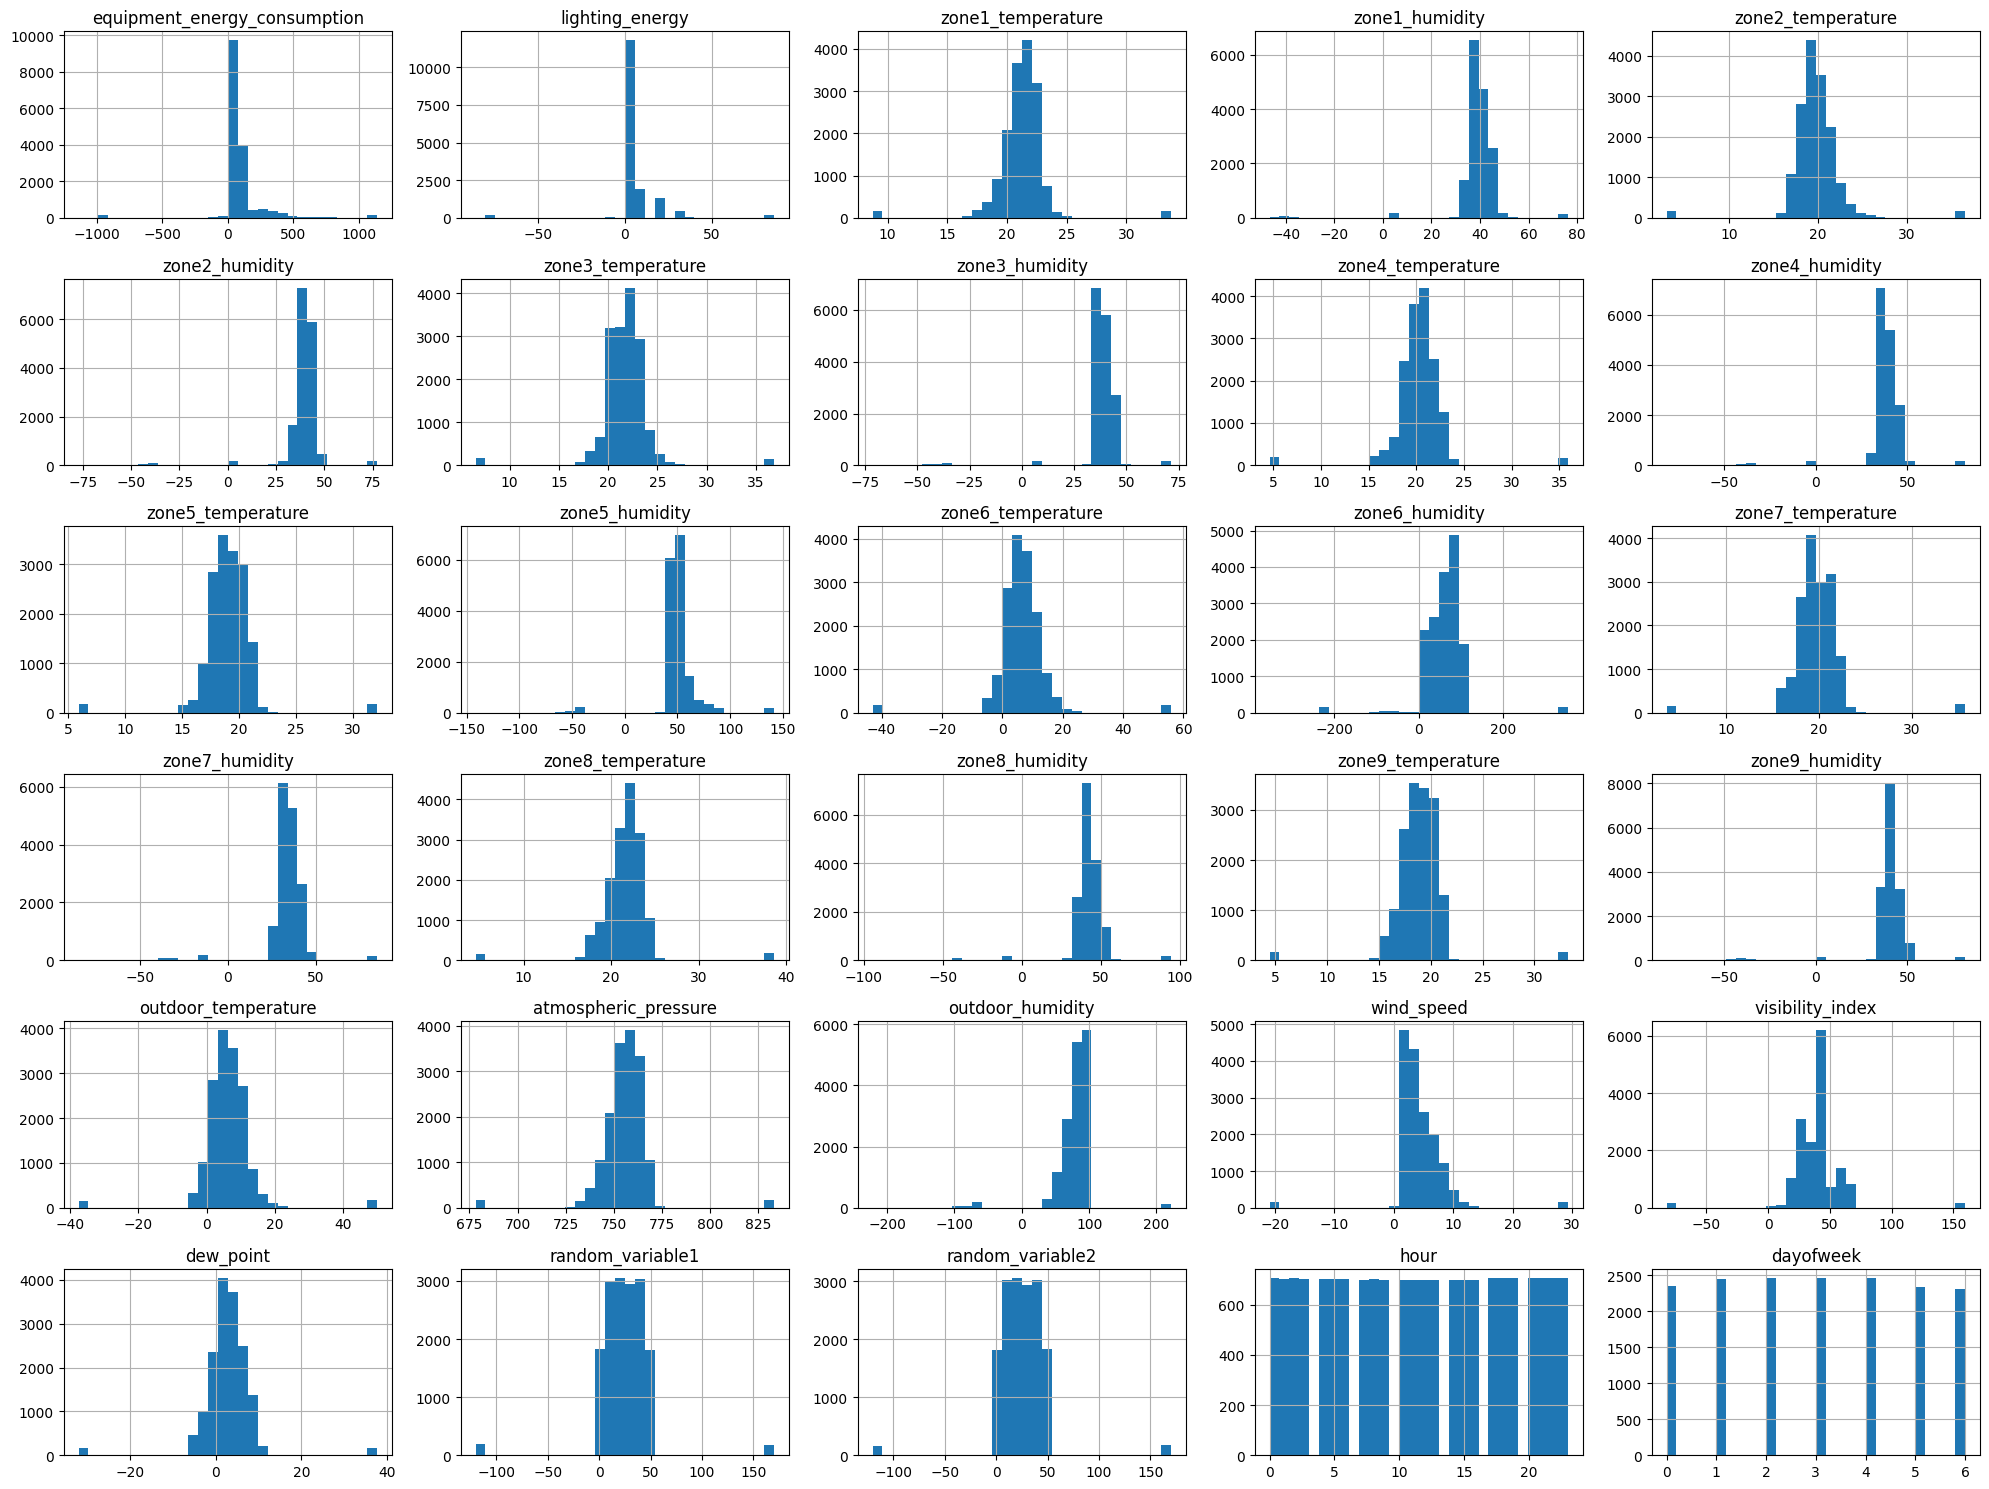

In [20]:
import matplotlib.pyplot as plt

df.select_dtypes(include=['float64', 'int32']).hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()
